In [14]:
import pandas as pd
import geopandas as gpd
import requests

In [39]:
geodata_url = "https://geodata.nationaalgeoregister.nl/cbsgebiedsindelingen/wfs?request=GetFeature&service=WFS&version=2.0.0&typeName=cbs_gemeente_2021_gegeneraliseerd&outputFormat=json"
gemeentegrenzen = gpd.read_file(geodata_url)

In [34]:
data = pd.read_csv('Data/Combi_df_klein.csv',index_col=0)
data = data.drop('Unnamed: 0.1',axis=1)

In [31]:
data.columns

Index(['Unnamed: 0.1', 'Date_of_report', 'Municipality_code',
       'Municipality_name', 'Province', 'Total_reported', 'Hospital_admission',
       'Deceased', 'Title', 'Totale bevolking', 'Mannen', 'Vrouwen',
       'Jonger dan 5 jaar.1', '5 tot 10 jaar.1', '10 tot 15 jaar.1',
       '15 tot 20 jaar.1', '20 tot 25 jaar.1', '25 tot 45 jaar.1',
       '45 tot 65 jaar.1', '65 tot 80 jaar.1', '80 jaar of ouder.1',
       'Nederlandse achtergrond.1', 'Totaal met migratieachtergrond.1',
       'Westerse migratieachtergrond.1',
       'Totaal niet-westerse migratieachtergrond.1', 'Marokko.1',
       '(voormalige) Nederlandse Antillen, Aruba.1', 'Suriname.1', 'Turkije.1',
       'Overig niet-westerse migratieachtergrond.1', 'Sterfte',
       'Sterfte, relatief', 'Bevolkingsdichtheid', 'Woningdichtheid',
       'Koopwoningen', 'Huurwoningen', 'Region_code',
       'Vaccination_coverage_partly', 'Vaccination_coverage_completed'],
      dtype='object')

In [45]:
data['Deceased_per_inhabitant'] = data['Deceased']/data['Totale bevolking']

In [32]:
data

,Unnamed: 0.1,Date_of_report,Municipality_code,Municipality_name,Province,Total_reported,Hospital_admission,Deceased,Title,Totale bevolking,...,Overig niet-westerse migratieachtergrond.1,Sterfte,"Sterfte, relatief",Bevolkingsdichtheid,Woningdichtheid,Koopwoningen,Huurwoningen,Region_code,Vaccination_coverage_partly,Vaccination_coverage_completed
0,221848,2021-11-10 10:00:00,GM0014,Groningen,Groningen,22852,119,50,GM0014,232874.0,...,7.7,1805.0,7.7,1255.0,627.0,41.2,58.1,GM0014,84,82
1,221849,2021-11-10 10:00:00,GM0034,Almere,Flevoland,27178,392,113,GM0034,211893.0,...,12.8,1084.0,5.1,1640.0,666.0,63.9,35.9,GM0034,76,75
2,221850,2021-11-10 10:00:00,GM0037,Stadskanaal,Groningen,3052,31,21,GM0037,31686.0,...,2.4,440.0,13.9,269.0,130.0,59.5,39.3,GM0037,84,82
3,221851,2021-11-10 10:00:00,GM0047,Veendam,Groningen,2383,13,11,GM0047,27384.0,...,2.8,310.0,11.3,360.0,169.0,65.0,34.8,GM0047,83,81
4,221852,2021-11-10 10:00:00,GM0050,Zeewolde,Flevoland,2323,22,14,GM0050,22653.0,...,3.7,115.0,5.1,92.0,35.0,70.5,29.4,GM0050,82,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,222194,2021-11-10 10:00:00,GM1963,Hoeksche Waard,Zuid-Holland,11491,165,68,GM1963,87401.0,...,2.8,858.0,9.8,325.0,141.0,70.2,29.6,GM1963,83,81
347,222195,2021-11-10 10:00:00,GM1966,Het Hogeland,Groningen,4959,40,20,GM1966,47801.0,...,2.5,495.0,10.4,99.0,47.0,67.0,32.8,GM1966,84,83
348,222196,2021-11-10 10:00:00,GM1969,Westerkwartier,Groningen,4889,39,26,GM1969,63329.0,...,2.3,592.0,9.3,175.0,75.0,71.7,28.0,GM1969,86,85
349,222197,2021-11-10 10:00:00,GM1970,Noardeast-Fryslân,Fryslân,5297,69,42,GM1970,45228.0,...,2.1,485.0,10.7,120.0,55.0,66.4,33.0,GM1970,80,78


In [46]:
gemeentegrenzen_data = pd.merge(gemeentegrenzen,data,how='left',left_on='statcode',right_on='Municipality_code')

<AxesSubplot:>

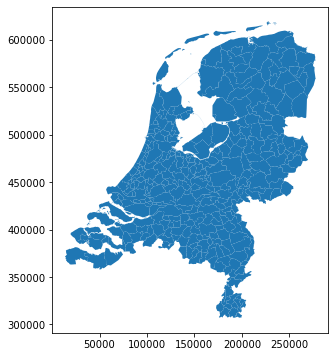

In [42]:
gemeentegrenzen_data.plot(figsize = (12,6))

<AxesSubplot:>

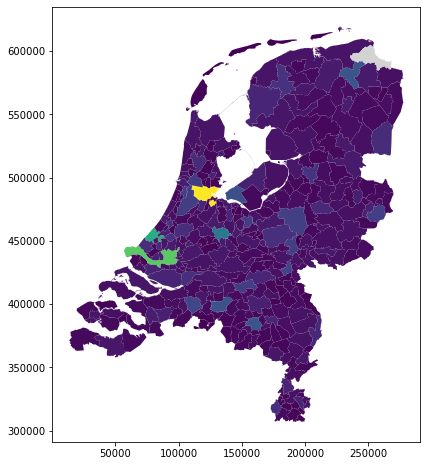

In [43]:
gemeentegrenzen_data.plot(column = 'Totale bevolking', figsize = (16,8),missing_kwds = dict(color = "lightgrey"))

<AxesSubplot:>

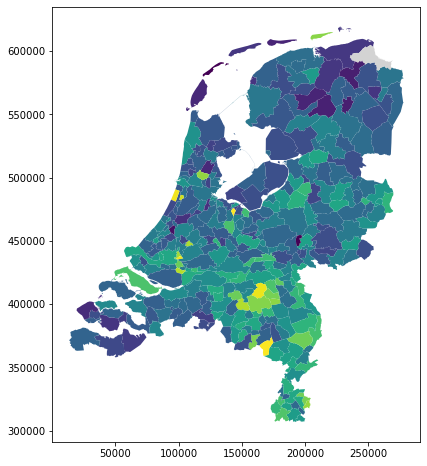

In [47]:
gemeentegrenzen_data.plot(column = 'Deceased_per_inhabitant', figsize = (16,8),missing_kwds = dict(color = "lightgrey"))

<AxesSubplot:>

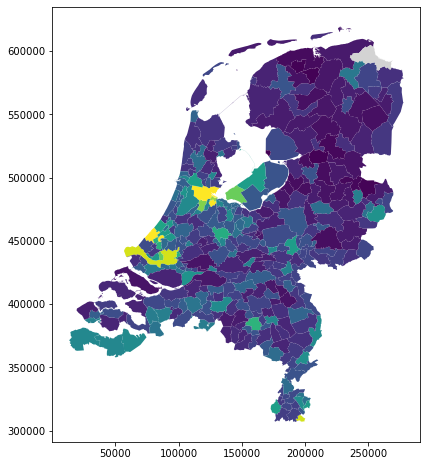

In [48]:
gemeentegrenzen_data.plot(column = 'Totaal met migratieachtergrond.1', figsize = (16,8),missing_kwds = dict(color = "lightgrey"))

<AxesSubplot:>

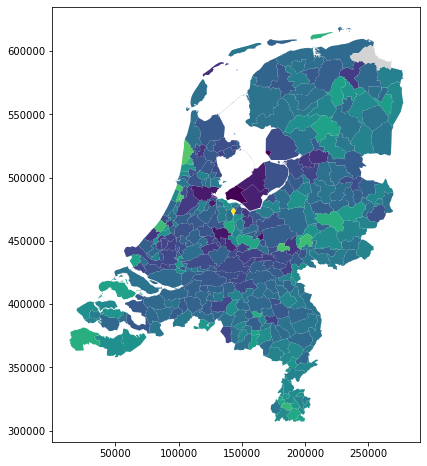

In [49]:
gemeentegrenzen_data.plot(column = '80 jaar of ouder.1', figsize = (16,8),missing_kwds = dict(color = "lightgrey"))

<AxesSubplot:>

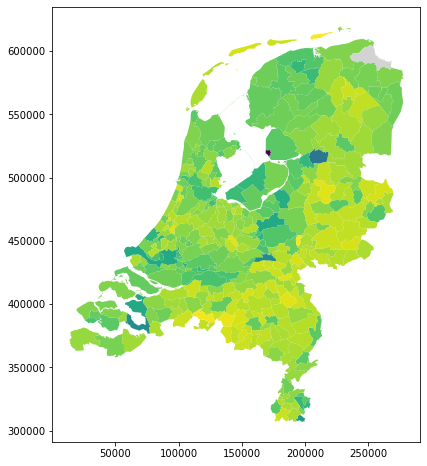

In [57]:
gemeentegrenzen_data.plot(column = 'Vaccination_coverage_completed', figsize = (16,8),missing_kwds = dict(color = "lightgrey"))